# TensorFlow v2

**Note** that, because this series of listings is rather long, we do not provide v1 compatibility code. Suffice to say that a v1 solution would make use of `tf.compat.v1...`

In [1]:
import tensorflow as tf
import numpy as np
from time import time

## Listing 2.12

In [2]:
@tf.function
def update_avg(alpha, curr_value, prev_avg):
    return alpha * curr_value + (1 - alpha) * prev_avg

## Listing 2.13

In [9]:
raw_data = np.random.normal(10, 1, 100)
raw_data = tf.convert_to_tensor(raw_data)

alpha = tf.constant(0.05, dtype=tf.float64)
curr_value = tf.Variable(0., dtype=tf.float64)
prev_avg = tf.Variable(0., dtype=tf.float64)

for i in range(len(raw_data)):
    curr_avg = update_avg(alpha, raw_data[i], prev_avg)

## Listing 2.14

**Notice** that we need to set the dtype explicitly. It is also necessary to cast our numpy array to avoid the performance penalties related to using non-tensorflow types in tf.function calls.

In [5]:
raw_data = np.random.normal(10, 1, 100)
raw_data = tf.convert_to_tensor(raw_data)

alpha = tf.constant(0.05, dtype=tf.float64)
curr_value = tf.Variable(0., dtype=tf.float64)
prev_avg = tf.Variable(0., dtype=tf.float64)

tic = time()
for i in range(len(raw_data)):
    curr_avg = update_avg(alpha, raw_data[i], prev_avg)
    prev_avg.assign(curr_avg)
    print("Current Value:", raw_data[i], "\t\tRunning Average:",  curr_avg.numpy())
toc = time()

print("Execution time: ", (toc-tic)*1000, "ms")

Current Value: tf.Tensor(11.521190680463123, shape=(), dtype=float64) 		Running Average: 0.5760595340231561
Current Value: tf.Tensor(10.535637044755301, shape=(), dtype=float64) 		Running Average: 1.0740384095597633
Current Value: tf.Tensor(9.842378105008855, shape=(), dtype=float64) 		Running Average: 1.5124553943322177
Current Value: tf.Tensor(10.110786836509247, shape=(), dtype=float64) 		Running Average: 1.942371966441069
Current Value: tf.Tensor(8.281426342879147, shape=(), dtype=float64) 		Running Average: 2.259324685262973
Current Value: tf.Tensor(10.248293902889166, shape=(), dtype=float64) 		Running Average: 2.6587731461442825
Current Value: tf.Tensor(8.553443047031822, shape=(), dtype=float64) 		Running Average: 2.9535066411886595
Current Value: tf.Tensor(9.414670562504645, shape=(), dtype=float64) 		Running Average: 3.2765648372544582
Current Value: tf.Tensor(9.394608018630251, shape=(), dtype=float64) 		Running Average: 3.5824669963232476
Current Value: tf.Tensor(9.58153584

## Listing 2.15

In [10]:
img = tf.Variable(0)
cost = tf.reduce_sum(0)
my_img_summary = tf.summary.image("img", img)
my_cost_summary = tf.summary.scalar("cost", cost)

## Listing 2.16

In [11]:
raw_data = tf.convert_to_tensor(np.random.normal(10, 1, 100), dtype=tf.float32)

alpha = tf.constant(0.05, dtype=tf.float32)
curr_value = tf.Variable(0., dtype=tf.float32)
prev_avg = tf.Variable(0., dtype=tf.float32)

writer = tf.summary.create_file_writer("./logs")

with writer.as_default():
    for i in range(len(raw_data)):
        curr_avg = update_avg(alpha, raw_data[i], prev_avg)
        prev_avg.assign(curr_avg)
        print(raw_data[i].numpy(), curr_avg.numpy())
        tf.summary.scalar("running_average", curr_avg, step=i)
        tf.summary.scalar("incoming_values", raw_data[i], step=i)
        writer.flush()

9.2888 0.46444002
10.07438 0.94493705
9.954709 1.3954257
9.88958 1.8201334
11.974684 2.327861
9.99555 2.7112455
9.62408 3.0568871
9.386224 3.373354
9.244302 3.6669014
11.507278 4.0589204
9.061292 4.3090386
11.338631 4.660518
11.726907 5.0138373
9.640975 5.2451944
9.206411 5.443255
11.068364 5.72451
8.8997135 5.8832703
10.177924 6.098003
10.401106 6.313158
10.976131 6.5463066
9.247269 6.6813545
10.083157 6.8514447
12.140484 7.1158967
9.395163 7.22986
10.579817 7.3973575
10.206229 7.5378013
10.447977 7.68331
9.251767 7.7617326
10.4235935 7.8948255
10.293585 8.014763
8.9049425 8.059272
10.3811865 8.175367
9.302564 8.231727
10.741178 8.3572
9.363506 8.407515
11.291538 8.551716
9.335832 8.590921
9.627568 8.642754
9.7214 8.696686
9.889089 8.756306
8.852934 8.761137
11.33377 8.889769
10.743334 8.982447
11.212327 9.093941
11.830179 9.230752
10.795443 9.308987
10.041246 9.3456
9.502747 9.353457
8.721108 9.321839
10.304229 9.370958
9.068742 9.355847
8.902761 9.333193
10.106903 9.371879
10.544086

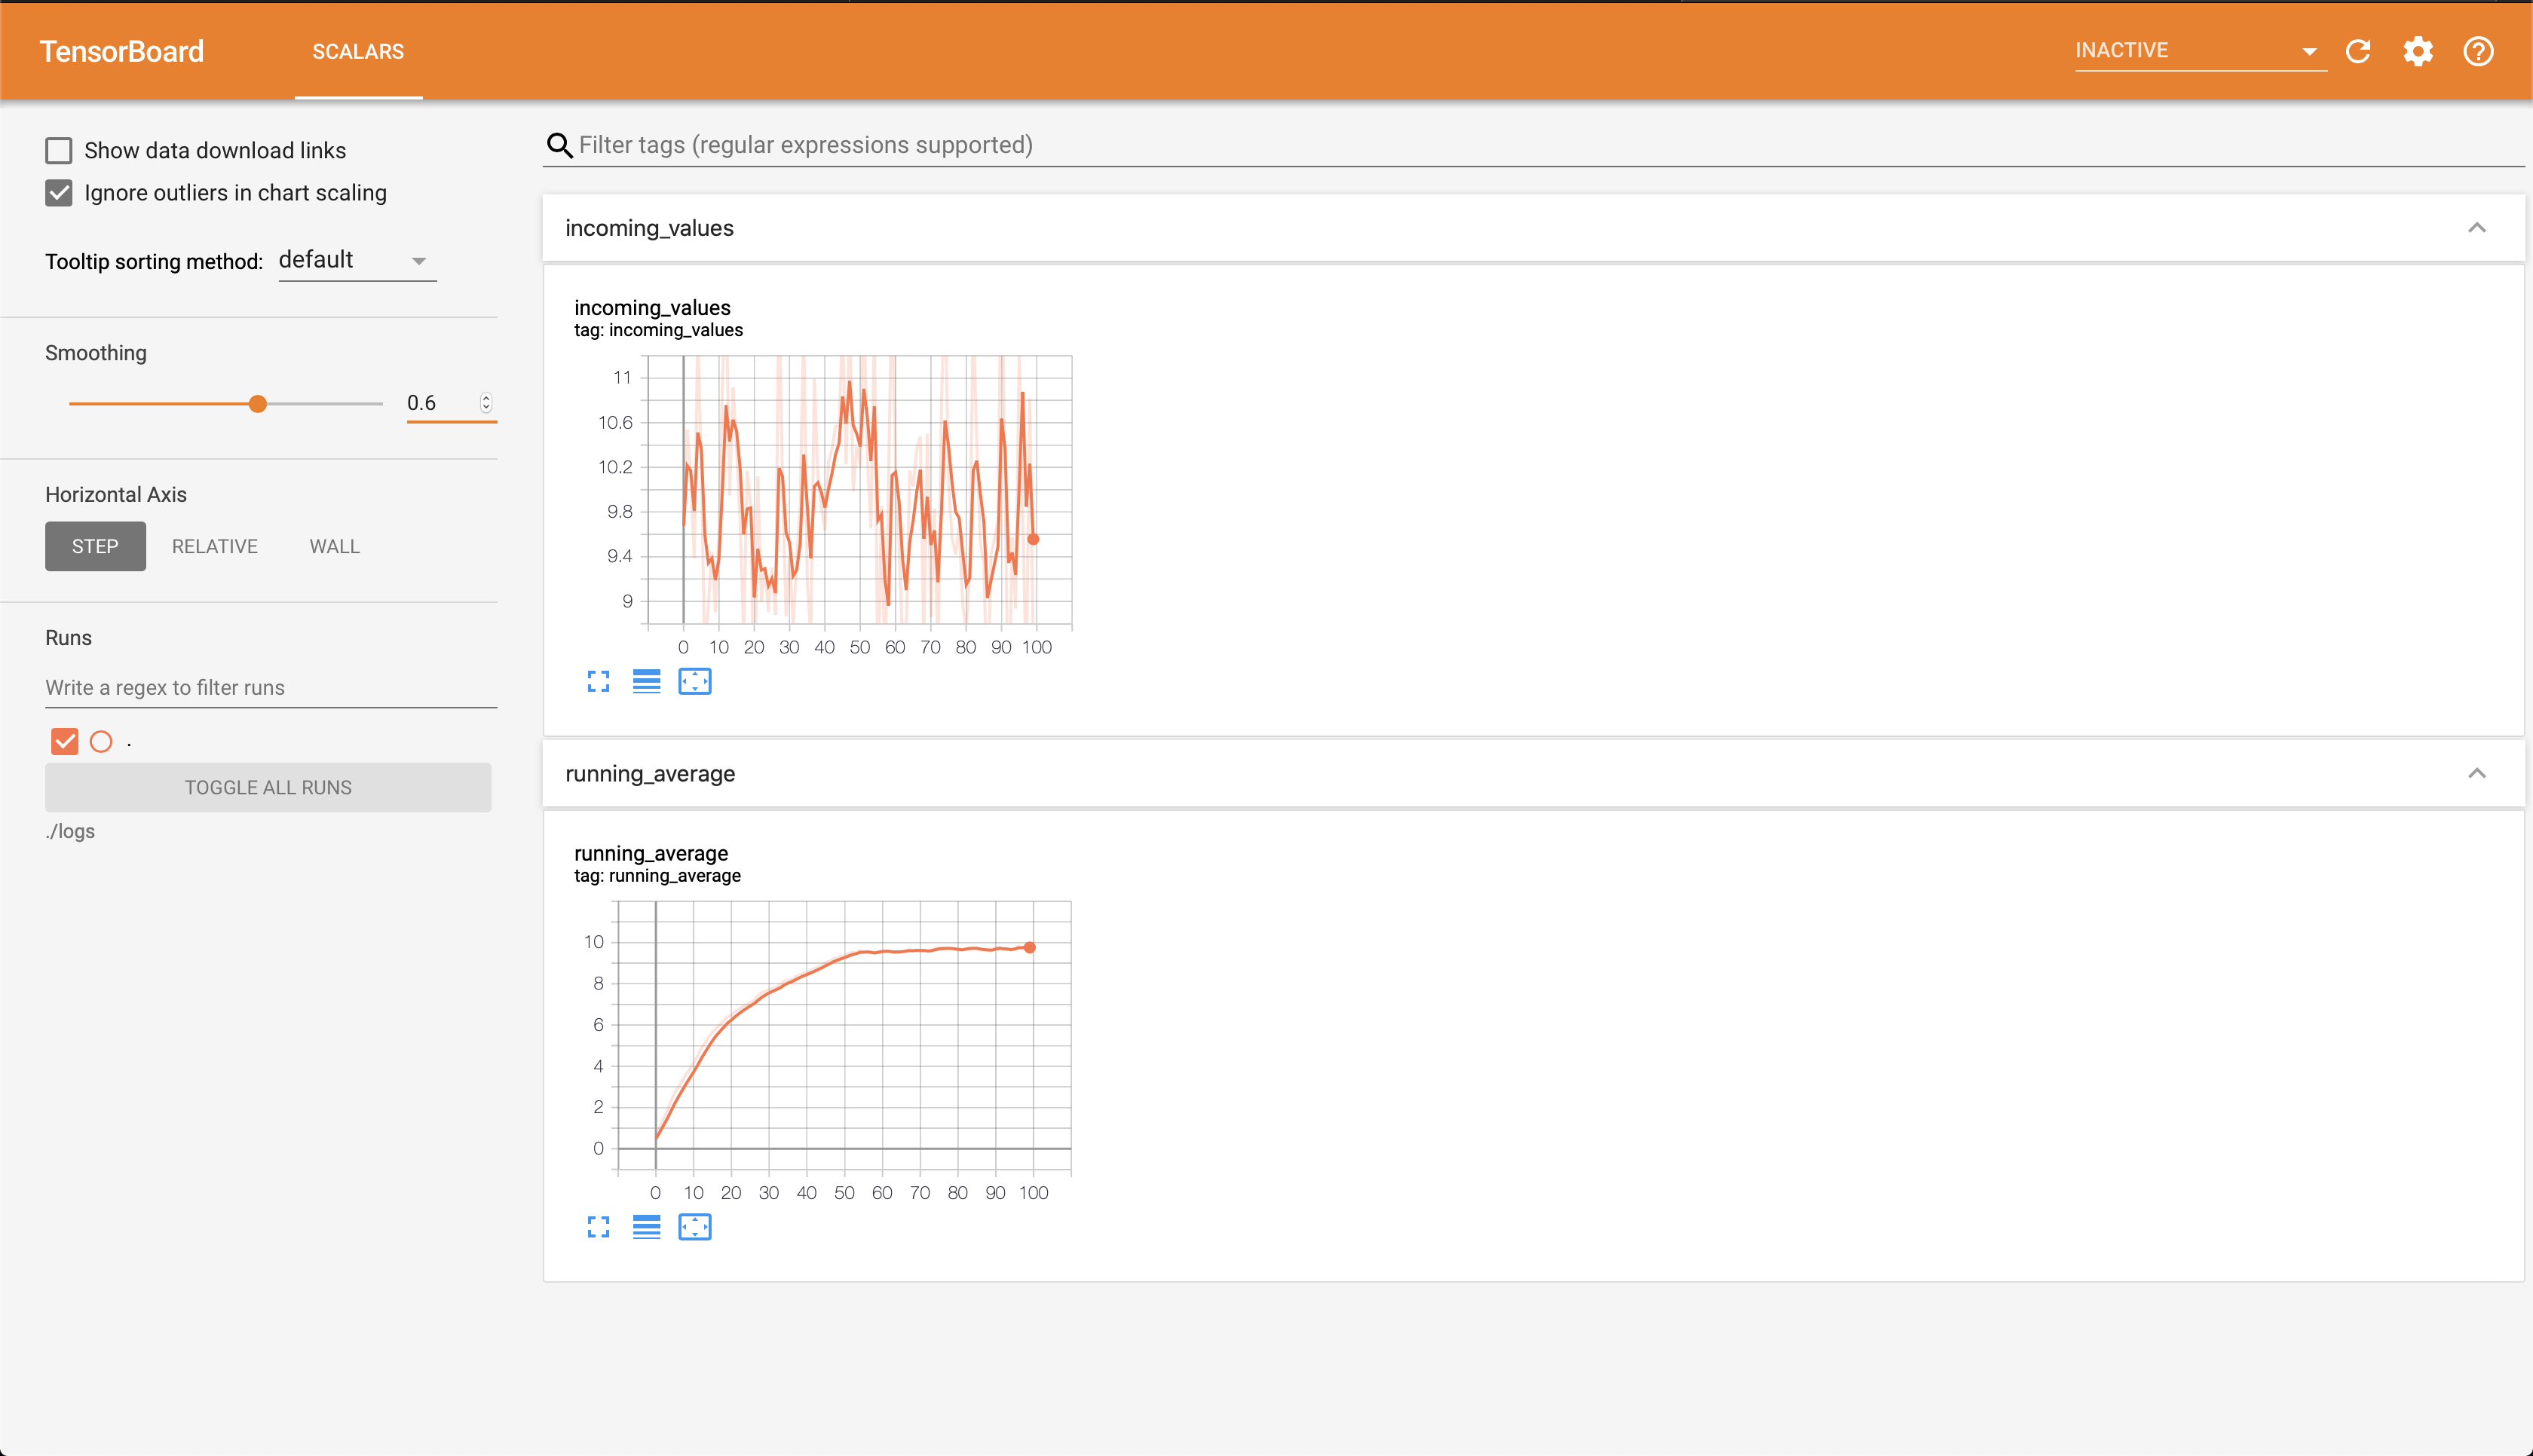